In [1]:
finname = '2017-09-25NMF_Ncomps16Basis.npy'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Basis = np.load(finname)

In [4]:
Basis.shape

(651, 16)

In [5]:
normedBasis = (Basis.T / np.sum(Basis.T, axis=0)).T

In [6]:
normedBasis.shape

(651, 16)

In [7]:
sum(normedBasis[0])

1.0

In [16]:
from sklearn.cluster import KMeans


In [8]:
def make_stacked_bar_plot(Ncomps, Nrelevant, BarMatrix, bargraph_out, names = [], plotClusterMode=False, barsortorder=[], clusterTopLabels=[], colormode='Sasha'):
    if len(barsortorder)<1:
        barsortorder = np.arange(Nrelevant)
        print('inventing barsortorder')
    if len(names) < 1:
        print('inventing names')
        names = [str(i) for i in range(Nrelevant)]
        names = np.array(names)
    ttt = np.arange(Nrelevant)
    start = 0
    end = Nrelevant
    ground_pSample = ttt*0
    Comp_colors = define_colorsA(Ncomps, mode=colormode)
    plt.clf()
    plt.figure(figsize=(150,40))
    plt.bar(ttt[start:end], BarMatrix[0,start:end][barsortorder], color='r',
             bottom=ground_pSample[start:end], alpha=0.75)
    ground_pSample = BarMatrix[0,start:end][barsortorder]
    for i in range(1,Ncomps):
        plt.bar(ttt[start:end],BarMatrix[i,start:end][barsortorder], bottom = ground_pSample, color=Comp_colors[i], alpha=0.75)
        ground_pSample = np.sum(BarMatrix[0: i+1,start:end], axis=0)[barsortorder]
    increase_axis_fontsize()
    plt.ylabel('sum of signal in matrix',fontsize=70)
    #plt.title('Full Sample',fontsize=70)
    samplenamesize = 11
    samplenamesize = (1/Nrelevant)**0.5 * 300
    #thebottom = 0.15
    thebottom = min([(1/Nrelevant)**0.3 * 1.2, 0.3])
    if(plotClusterMode):
        plt.xticks(ttt, ttt.astype(str), rotation='vertical', fontsize=samplenamesize)
        if len(clusterTopLabels) > 0:
            ax = plt.gca()
            ax2 = ax.twiny()
            ax2.set_xticks(ttt)
            ax2.set_xticklabels(clusterTopLabels.astype(str), rotation=90, fontsize=samplenamesize)
            #ax.xaxis.tick_top()
            #plt.xticks(ttt, clusterTopLabels.astype(str), rotation='vertical', fontsize=samplenamesize)
    else:
        plt.xticks(ttt, names[barsortorder], rotation='vertical', fontsize=samplenamesize)	
    plot_margin = 5
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
    plt.savefig(bargraph_out)
    plt.close()	

In [9]:
def define_colorsA(Ncomps, mode='Sasha'):
    if (mode=='Sasha'):
        Comp_colors = ['red', 'tan', 'lime','blue','m','k','c', 'coral', 'indigo','darkgreen','orange','grey','gold', 'lightskyblue', 'peru', 'olive']
    elif (mode == 'Wouter'):
        Comp_colors = ["#A6CEE3", "#438EC0", "#63A8A0", "#98D277", "#3BA432", "#B89B74", "#F16667", "#E62F27", "#F9A963", "#FE982C", "#ED8F47", "#C3AAD2", "#7D54A5","#B9A499", "#EAD27A" ,"#B15928"]
    if (Ncomps>16):
        np.random.seed(666)
        from matplotlib import colors as mcolors
        colornames = list(mcolors.CSS4_COLORS.keys())
        count = 16
        while (count < Ncomps):
            newcolor = colornames[np.random.randint(0,len(colornames))]
            trialcount = 0
            while ((newcolor in Comp_colors) and (trialcount < 100)):
                newcolor = colornames[np.random.randint(0,len(colornames))]
                trialcount+=1
            Comp_colors.append(newcolor)
            count+=1
    return Comp_colors

In [10]:
from OONMFhelpers import *

/Users/amuratov/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [36]:
kmeans_normed_sample_normed = KMeans(n_clusters=16, random_state=0).fit(normedBasis)


In [39]:
kmeans_normed_sample_normed.labels_

array([ 4, 14,  4, 14,  3,  6,  3,  0,  8,  3, 14,  3, 15, 15, 15,  3,  5,
        5,  1,  1, 11, 11, 11, 11, 11, 11, 11, 11, 11,  3,  7,  2,  7, 14,
        5, 11,  2, 14,  2,  8,  3,  3,  3,  4,  3,  8,  7,  7, 14, 14,  9,
       10,  9,  6,  4,  4,  4,  4,  4,  4,  3, 14, 14, 14,  4,  4,  8,  8,
       14,  8,  6,  2,  6,  6,  6, 14,  4,  4,  7,  7, 14,  0, 13,  8, 13,
        0,  4, 14, 14,  4,  4, 14, 11,  3,  7,  7, 14,  4,  4,  7,  0,  4,
        8,  6,  8, 13,  4,  8,  8,  5, 13,  6,  6,  8, 14,  4, 14, 14,  7,
        7,  9,  0,  9,  9,  7,  3, 13, 13,  6,  5,  0,  9,  0,  6,  4,  4,
        4,  4,  3,  9,  9,  7,  9,  9,  9,  9,  7,  7,  9,  9,  0,  9,  7,
        3,  2,  2,  0,  9,  4,  9, 14,  0, 14, 14,  7,  7,  4,  4,  9,  0,
        8, 11,  1, 14,  0,  9,  0,  0,  4,  4,  7,  7,  7,  0,  9,  3,  7,
        7,  7,  7,  1,  7,  7,  7,  0,  4,  0,  0,  0,  0,  0,  0,  6, 10,
        6, 10, 10, 10,  8,  8, 14, 14, 14, 14,  4,  4,  4,  3,  6, 10, 10,
       10, 10,  7,  7,  0

In [41]:
clusterassignments = kmeans_normed_sample_normed.labels_

In [40]:
kmeans_normed_sample_normed.inertia_

40.188547075789131

In [42]:
for i in range(16):
    print('doing ',i)
    basiscut = clusterassignments==i
    normedbarsortorder = get_barsortorder(normedBasis[basiscut])
    make_stacked_bar_plot(16, len(basiscut[basiscut]), normedBasis[basiscut].T, 'normedcluster'+str(i)+'.pdf', barsortorder=normedbarsortorder)

doing  0
inventing names
doing  1
inventing names
doing  2
inventing names
doing  3
inventing names
doing  4
inventing names
doing  5
inventing names
doing  6
inventing names
doing  7
inventing names
doing  8
inventing names
doing  9
inventing names
doing  10
inventing names
doing  11
inventing names
doing  12
inventing names
doing  13
inventing names
doing  14
inventing names
doing  15
inventing names


In [57]:
clusternums = [i for i in range(2, 64)]
inertialist = []
for i in clusternums:
    print('doing ',i)
    kmeans_normed_sample_normed = KMeans(n_clusters=i, random_state=0).fit(normedBasis)
    inertialist.append(kmeans_normed_sample_normed.inertia_)


doing  2
doing  3
doing  4
doing  5
doing  6
doing  7
doing  8
doing  9
doing  10
doing  11
doing  12
doing  13
doing  14
doing  15
doing  16
doing  17
doing  18
doing  19
doing  20
doing  21
doing  22
doing  23
doing  24
doing  25
doing  26
doing  27
doing  28
doing  29
doing  30
doing  31
doing  32
doing  33
doing  34
doing  35
doing  36
doing  37
doing  38
doing  39
doing  40
doing  41
doing  42
doing  43
doing  44
doing  45
doing  46
doing  47
doing  48
doing  49
doing  50
doing  51
doing  52
doing  53
doing  54
doing  55
doing  56
doing  57
doing  58
doing  59
doing  60
doing  61
doing  62
doing  63


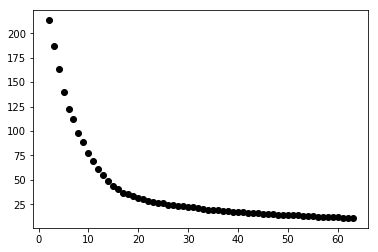

In [58]:
plt.clf()
plt.plot(clusternums, inertialist, 'ok')
plt.show()

In [59]:
inertialist

[213.31858130564609,
 187.41847236810733,
 163.449129915067,
 140.37638652114447,
 122.5460626582264,
 111.90850822233203,
 98.232777590203057,
 88.709247776277977,
 77.916099569627548,
 69.304546940290223,
 60.895037065287724,
 55.153496408124255,
 49.254473739506047,
 43.904949416233173,
 40.188547075789131,
 36.917571200478733,
 35.065566039447731,
 33.076340605011055,
 31.470368438679557,
 30.201122561992364,
 28.412683314594691,
 27.532775625833629,
 26.697495963126933,
 26.044542693395776,
 24.694595535913265,
 23.938909995667569,
 23.181184373580237,
 23.170276599828188,
 21.890007519831848,
 21.805702597961208,
 20.80227201903368,
 20.319197028631166,
 19.519145785360394,
 19.262703860422853,
 18.757207163687731,
 18.310564695484064,
 17.75344920527785,
 17.546997272913369,
 17.210494914626928,
 16.654585311747145,
 16.465854923406177,
 16.466467806818464,
 15.816306601067005,
 15.493486868581446,
 14.999211658953609,
 14.72059893493506,
 14.540404529557296,
 14.330431940204312

In [60]:
clusternums

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63]

In [61]:
np.gradient(inertialist)

array([-25.90010894, -24.9347257 , -23.52104292, -20.45153363,
       -14.23393915, -12.15664253, -11.59963022, -10.15833901,
        -9.70235042,  -8.51053125,  -7.07552527,  -5.82028166,
        -5.6242735 ,  -4.53296333,  -3.49368911,  -2.56149052,
        -1.9206153 ,  -1.7975988 ,  -1.43760902,  -1.52884256,
        -1.33417347,  -0.85759368,  -0.74411647,  -1.00145021,
        -1.05281635,  -0.75670558,  -0.3843167 ,  -0.64558843,
        -0.682287  ,  -0.54386775,  -0.74325278,  -0.64156312,
        -0.52824658,  -0.38096931,  -0.47606958,  -0.50187898,
        -0.38178371,  -0.27147715,  -0.44620598,  -0.37232   ,
        -0.09405875,  -0.32477416,  -0.48649047,  -0.40854747,
        -0.38644397,  -0.22940356,  -0.1950835 ,  -0.39401729,
        -0.39224903,  -0.10514263,  -0.11331976,  -0.36673714,
        -0.38200461,  -0.15879725,  -0.31049579,  -0.2688075 ,
        -0.06552423,  -0.23221524,  -0.19578648,  -0.2217684 ,
        -0.14733657,   0.07156539])

In [62]:
len(np.gradient(inertialist))

62

In [63]:
len(clusternums)

62

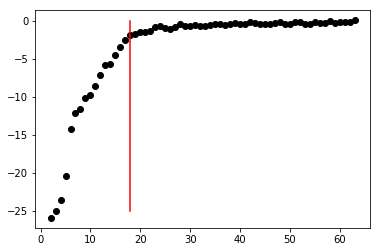

In [64]:
plt.clf()
plt.plot(clusternums,np.gradient(inertialist),'ok' )
plt.plot([18,18],[-25, 0], '-r')
plt.show()

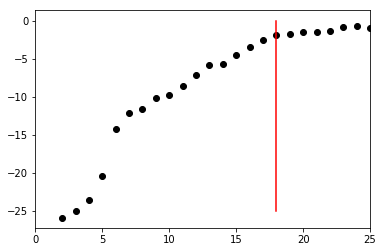

In [73]:
plt.clf()
plt.plot(clusternums,np.gradient(inertialist),'ok' )
plt.plot([18,18],[-25, 0], '-r')
plt.xlim([0,25])
plt.show()

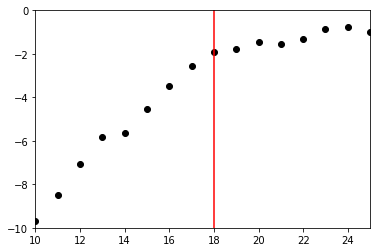

In [70]:
plt.clf()
plt.plot(clusternums,np.gradient(inertialist),'ok' )
plt.plot([18,18],[-25, 0], '-r')
plt.xlim(10, 25)
plt.ylim(-10, 0)
plt.show()

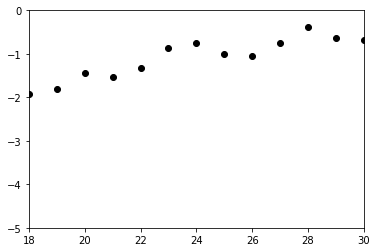

In [72]:
plt.clf()
plt.plot(clusternums,np.gradient(inertialist),'ok' )
#plt.plot([18,18],[-25, 0], '-r')
plt.xlim(18,30)
plt.ylim(-5, 0)
plt.show()

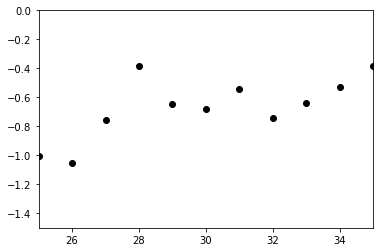

In [76]:
plt.clf()
plt.plot(clusternums,np.gradient(inertialist),'ok' )
#plt.plot([18,18],[-25, 0], '-r')
plt.xlim(25,35)
plt.ylim(-1.5, 0)
plt.show()

In [81]:
kmeans_normed_sample_normed = KMeans(n_clusters=18, random_state=0).fit(normedBasis)
clusterassignments = kmeans_normed_sample_normed.labels_
for i in range(18):
    print('doing ',i)
    basiscut = clusterassignments==i
    normedbarsortorder = get_barsortorder(normedBasis[basiscut])
    make_stacked_bar_plot(16, len(basiscut[basiscut]), normedBasis[basiscut].T, 'normedcluster'+str(i)+'outof18.pdf', barsortorder=normedbarsortorder)

doing  0
inventing names
doing  1
inventing names
doing  2
inventing names
doing  3
inventing names
doing  4
inventing names
doing  5
inventing names
doing  6
inventing names
doing  7
inventing names
doing  8
inventing names
doing  9
inventing names
doing  10
inventing names
doing  11
inventing names
doing  12
inventing names
doing  13
inventing names
doing  14
inventing names
doing  15
inventing names
doing  16
inventing names
doing  17
inventing names


In [83]:
kmeans_normed_sample_normed = KMeans(n_clusters=32, random_state=0).fit(normedBasis)
clusterassignments = kmeans_normed_sample_normed.labels_
for i in range(32):
    print('doing ',i)
    basiscut = clusterassignments==i
    normedbarsortorder = get_barsortorder(normedBasis[basiscut])
    make_stacked_bar_plot(16, len(basiscut[basiscut]), normedBasis[basiscut].T, 'normedcluster'+str(i)+'outof32.pdf', barsortorder=normedbarsortorder)

doing  0
inventing names
doing  1
inventing names
doing  2
inventing names
doing  3
inventing names
doing  4
inventing names
doing  5
inventing names
doing  6
inventing names
doing  7
inventing names
doing  8
inventing names
doing  9
inventing names
doing  10
inventing names
doing  11
inventing names
doing  12
inventing names
doing  13
inventing names
doing  14
inventing names
doing  15
inventing names
doing  16
inventing names
doing  17
inventing names
doing  18
inventing names
doing  19
inventing names
doing  20
inventing names
doing  21
inventing names
doing  22
inventing names
doing  23
inventing names
doing  24
inventing names
doing  25
inventing names
doing  26
inventing names
doing  27
inventing names
doing  28
inventing names
doing  29
inventing names
doing  30
inventing names
doing  31
inventing names


In [84]:
unnormed_inertialist = []
for i in clusternums:
    print('doing ',i)
    kmeans_normed_sample_unnormed = KMeans(n_clusters=i, random_state=0).fit(Basis)
    unnormed_inertialist.append(kmeans_normed_sample_unnormed.inertia_)


doing  2
doing  3
doing  4
doing  5
doing  6
doing  7
doing  8
doing  9
doing  10
doing  11
doing  12
doing  13
doing  14
doing  15
doing  16
doing  17
doing  18
doing  19
doing  20
doing  21
doing  22
doing  23
doing  24
doing  25
doing  26
doing  27
doing  28
doing  29
doing  30
doing  31
doing  32
doing  33
doing  34
doing  35
doing  36
doing  37
doing  38
doing  39
doing  40
doing  41
doing  42
doing  43
doing  44
doing  45
doing  46
doing  47
doing  48
doing  49
doing  50
doing  51
doing  52
doing  53
doing  54
doing  55
doing  56
doing  57
doing  58
doing  59
doing  60
doing  61
doing  62
doing  63


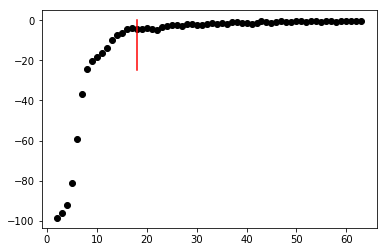

In [86]:
plt.clf()
plt.plot(clusternums,np.gradient(unnormed_inertialist),'ok' )
plt.plot([18,18],[-25, 0], '-r')
plt.show()

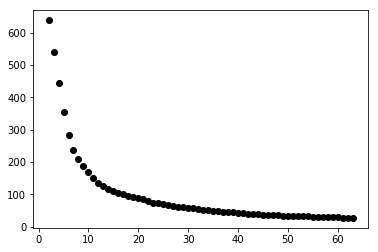

In [106]:
plt.clf()
plt.plot(clusternums,unnormed_inertialist,'ok' )
#plt.plot([18,18],[-25, 0], '-r')
plt.show()

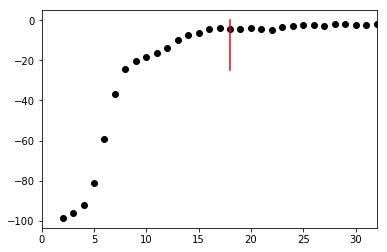

In [87]:
plt.clf()
plt.plot(clusternums,np.gradient(unnormed_inertialist),'ok' )
plt.plot([18,18],[-25, 0], '-r')
plt.xlim([0,32])
plt.show()

In [90]:
kmeans_normed_sample = KMeans(n_clusters=16, random_state=0).fit(Basis)
clusterassignments = kmeans_normed_sample.labels_
for i in range(16):
    print('doing ',i)
    basiscut = clusterassignments==i
    UNnormedbarsortorder = get_barsortorder(Basis[basiscut])
    make_stacked_bar_plot(16, len(basiscut[basiscut]), Basis[basiscut].T, 'UNnormedcluster'+str(i)+'outof16.pdf', barsortorder=UNnormedbarsortorder)

doing  0
inventing names
doing  1
inventing names
doing  2
inventing names
doing  3
inventing names
doing  4
inventing names
doing  5
inventing names
doing  6
inventing names
doing  7
inventing names
doing  8
inventing names
doing  9
inventing names
doing  10
inventing names
doing  11
inventing names
doing  12
inventing names
doing  13
inventing names
doing  14
inventing names
doing  15
inventing names


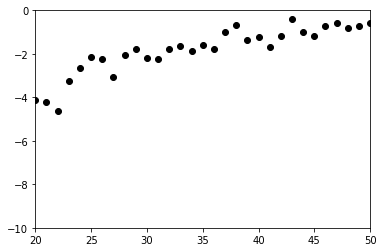

In [92]:
plt.clf()
plt.plot(clusternums,np.gradient(unnormed_inertialist),'ok' )
plt.xlim([20,50])
plt.ylim([-10,0])
plt.show()

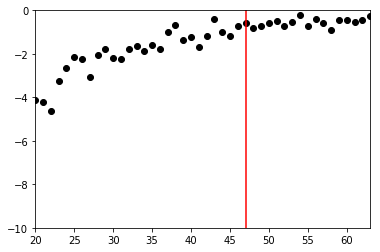

In [105]:
plt.clf()
plt.plot(clusternums,np.gradient(unnormed_inertialist),'ok' )
plt.xlim([20,63])
plt.plot([47,47],[-10, 0], '-r')
plt.ylim([-10,0])
plt.show()

In [93]:
kmeans_normed_sample = KMeans(n_clusters=32, random_state=0).fit(Basis)
clusterassignments = kmeans_normed_sample.labels_
for i in range(32):
    print('doing ',i)
    basiscut = clusterassignments==i
    print('basiscut length ',len(basiscut[basiscut]))
    UNnormedbarsortorder = get_barsortorder(Basis[basiscut])
    make_stacked_bar_plot(16, len(basiscut[basiscut]), Basis[basiscut].T, 'UNnormedcluster'+str(i)+'outof32.pdf', barsortorder=UNnormedbarsortorder)

doing  0
inventing names
doing  1
inventing names
doing  2
inventing names
doing  3
inventing names
doing  4
inventing names
doing  5
inventing names
doing  6
inventing names
doing  7
inventing names
doing  8
inventing names
doing  9
inventing names
doing  10
inventing names
doing  11
inventing names
doing  12
inventing names
doing  13
inventing names
doing  14
inventing names
doing  15
inventing names
doing  16
inventing names
doing  17
inventing names
doing  18
inventing names
doing  19
inventing names
doing  20
inventing names
doing  21
inventing names
doing  22
inventing names
doing  23
inventing names
doing  24
inventing names
doing  25
inventing names
doing  26
inventing names
doing  27
inventing names
doing  28
inventing names
doing  29
inventing names
doing  30
inventing names
doing  31
inventing names


In [100]:
kmeans_normed_sample = KMeans(n_clusters=46, random_state=666).fit(Basis)
clusterassignments = kmeans_normed_sample.labels_
for i in range(46):
    print('doing ',i)
    basiscut = clusterassignments==i
    UNnormedbarsortorder = get_barsortorder(Basis[basiscut])
    print(len(basiscut[basiscut]))
    make_stacked_bar_plot(16, len(basiscut[basiscut]), Basis[basiscut].T, 'UNnormedcluster'+str(i)+'outof46.pdf', barsortorder=UNnormedbarsortorder)

doing  0
46
inventing names
doing  1
2
inventing names
doing  2
6
inventing names
doing  3
4
inventing names
doing  4
5
inventing names
doing  5
6
inventing names
doing  6
18
inventing names
doing  7
8
inventing names
doing  8
26
inventing names
doing  9
6
inventing names
doing  10
9
inventing names
doing  11
8
inventing names
doing  12
100
inventing names
doing  13
23
inventing names
doing  14
12
inventing names
doing  15
4
inventing names
doing  16
3
inventing names
doing  17
15
inventing names
doing  18
5
inventing names
doing  19
8
inventing names
doing  20
2
inventing names
doing  21
20
inventing names
doing  22
13
inventing names
doing  23
3
inventing names
doing  24
16
inventing names
doing  25
38
inventing names
doing  26
71
inventing names
doing  27
5
inventing names
doing  28
4
inventing names
doing  29
12
inventing names
doing  30
16
inventing names
doing  31
3
inventing names
doing  32
5
inventing names
doing  33
14
inventing names
doing  34
2
inventing names
doing  35
6
in

In [101]:
kmeans_normed_sample = KMeans(n_clusters=64, random_state=666).fit(Basis)
clusterassignments = kmeans_normed_sample.labels_
for i in range(64):
    print('doing ',i)
    basiscut = clusterassignments==i
    UNnormedbarsortorder = get_barsortorder(Basis[basiscut])
    print(len(basiscut[basiscut]))
    make_stacked_bar_plot(16, len(basiscut[basiscut]), Basis[basiscut].T, 'UNnormedcluster'+str(i)+'outof64.pdf', barsortorder=UNnormedbarsortorder)

doing  0
37
inventing names
doing  1
4
inventing names
doing  2
9
inventing names
doing  3
4
inventing names
doing  4
6
inventing names
doing  5
25
inventing names
doing  6
3
inventing names
doing  7
9
inventing names
doing  8
8
inventing names
doing  9
1
inventing names
doing  10
8
inventing names
doing  11
3
inventing names
doing  12
6
inventing names
doing  13
7
inventing names
doing  14
3
inventing names
doing  15
19
inventing names
doing  16
7
inventing names
doing  17
1
inventing names
doing  18
3
inventing names
doing  19
54
inventing names
doing  20
35
inventing names
doing  21
5
inventing names
doing  22
2
inventing names
doing  23
58
inventing names
doing  24
2
inventing names
doing  25
15
inventing names
doing  26
9
inventing names
doing  27
11
inventing names
doing  28
3
inventing names
doing  29
3
inventing names
doing  30
5
inventing names
doing  31
11
inventing names
doing  32
6
inventing names
doing  33
7
inventing names
doing  34
38
inventing names
doing  35
5
inventin

In [11]:
finname = '2017-09-25NMF_Ncomps16Mixture.npy'

In [12]:
Mixture = np.load(finname)

In [13]:
NormedMixture =   Mixture / np.sum(Mixture, axis=0)

In [14]:
NormedMixture.shape

(16, 2232744)

In [17]:
kmeans_normed_DHS= KMeans(n_clusters=200, random_state=0).fit(NormedMixture.T)


KeyboardInterrupt: 

In [113]:
kmeans_normed_DHS

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [118]:
clusterassignments = kmeans_normed_DHS.labels_
for i in range(16):
    print('doing ',i)
    mixturecut = clusterassignments==i
    print('basiscut length ',len(mixturecut[mixturecut]))
    
    if len(mixturecut[mixturecut] ) > 40:
        chosenNum = 40
    else:
        chosenNum = len(mixturecut[mixturecut])
    
    possibleDHS = np.arange(len(mixturecut))[mixturecut]
    desiredDHS = np.random.choice(possibleDHS, chosenNum,replace=False)
    VisualDHScut = np.in1d(np.arange(len(mixturecut)), desiredDHS)
    desired_order = np.argsort(-NormedMixture.T[VisualDHScut][:,i])
    #UNnormedbarsortorder = get_barsortorder(Mixture.T[mixturecut])
    make_stacked_bar_plot(16, chosenNum, NormedMixture.T[VisualDHScut][desired_order].T, 'DHScluster'+str(i)+'outof16.pdf')

doing  0
basiscut length  277546
inventing barsortorder
inventing names
doing  1
basiscut length  317371
inventing barsortorder
inventing names
doing  2
basiscut length  45044
inventing barsortorder
inventing names
doing  3
basiscut length  88592
inventing barsortorder
inventing names
doing  4
basiscut length  183789
inventing barsortorder
inventing names
doing  5
basiscut length  273965
inventing barsortorder
inventing names
doing  6
basiscut length  139233
inventing barsortorder
inventing names
doing  7
basiscut length  216994
inventing barsortorder
inventing names
doing  8
basiscut length  114550
inventing barsortorder
inventing names
doing  9
basiscut length  119329
inventing barsortorder
inventing names
doing  10
basiscut length  71791
inventing barsortorder
inventing names
doing  11
basiscut length  73077
inventing barsortorder
inventing names
doing  12
basiscut length  80301
inventing barsortorder
inventing names
doing  13
basiscut length  52483
inventing barsortorder
inventing 

In [120]:
DHSnormed_inertialist = []
for i in clusternums:
    print('doing ',i)
    kmeans_normed_DHS = KMeans(n_clusters=i, random_state=0).fit(NormedMixture.T)
    DHSnormed_inertialist.append(kmeans_normed_DHS.inertia_)

doing  2
doing  3
doing  4
doing  5
doing  6
doing  7
doing  8
doing  9
doing  10
doing  11
doing  12
doing  13
doing  14
doing  15
doing  16
doing  17
doing  18
doing  19
doing  20
doing  21


KeyboardInterrupt: 

In [121]:
DHSnormed_inertialist

[884650.99379151501,
 761116.01817889127,
 634544.62568453653,
 530351.86915316968,
 477079.5829785965,
 430519.42741964117,
 394057.82971147582,
 356002.23923421698,
 321220.01026642794,
 297317.61986754515,
 275636.5421396906,
 251301.86034543268,
 229850.13434603109,
 214945.04071802017,
 197764.85832980898,
 186483.28942696648,
 176093.11025232796,
 167243.16985695652,
 161807.05195811405]

In [122]:
len(DHSnormed_inertialist)

19

In [123]:
clusternums[0:19]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

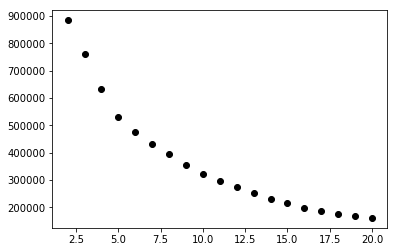

In [124]:
plt.clf()
plt.plot(clusternums[0:19], DHSnormed_inertialist, 'ok')
plt.show()

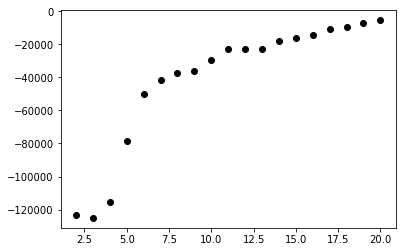

In [125]:
plt.clf()
plt.plot(clusternums[0:19], np.gradient(DHSnormed_inertialist), 'ok')
plt.show()

In [126]:

for i in clusternums[19:]:
    print('doing ',i)
    kmeans_normed_DHS = KMeans(n_clusters=i, random_state=0).fit(NormedMixture.T)
    DHSnormed_inertialist.append(kmeans_normed_DHS.inertia_)

doing  21
doing  22
doing  23
doing  24
doing  25
doing  26
doing  27
doing  28
doing  29
doing  30
doing  31
doing  32
doing  33
doing  34
doing  35
doing  36
doing  37
doing  38
doing  39
doing  40
doing  41
doing  42
doing  43
doing  44
doing  45
doing  46
doing  47
doing  48
doing  49
doing  50
doing  51
doing  52
doing  53
doing  54
doing  55
doing  56
doing  57
doing  58
doing  59
doing  60
doing  61
doing  62
doing  63


In [127]:
56


56

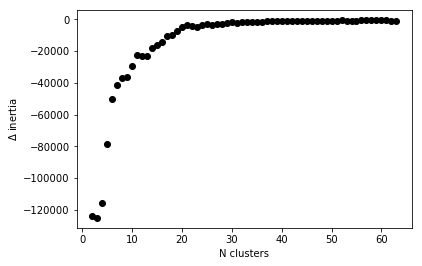

In [142]:
plt.clf()
plt.xlabel('N clusters')
plt.ylabel(r'$\Delta$ inertia')
plt.plot(clusternums, np.gradient(DHSnormed_inertialist), 'ok')
plt.show()

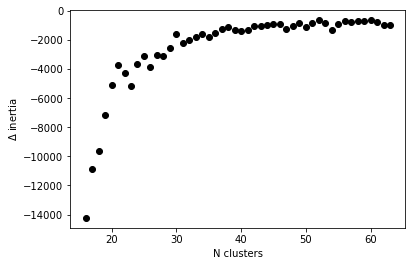

In [143]:
plt.clf()
plt.xlabel('N clusters')
plt.ylabel(r'$\Delta$ inertia')
plt.plot(clusternums[14:], np.gradient(DHSnormed_inertialist)[14:], 'ok')
plt.show()

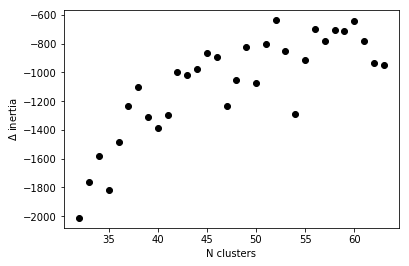

In [144]:
plt.clf()
plt.xlabel('N clusters')
plt.ylabel(r'$\Delta$ inertia')
plt.plot(clusternums[30:], np.gradient(DHSnormed_inertialist)[30:], 'ok')
plt.show()

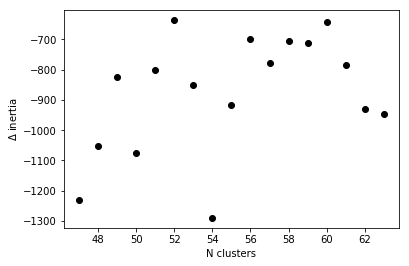

In [150]:
plt.clf()
plt.plot(clusternums[45:], np.gradient(DHSnormed_inertialist)[45:], 'ok')
plt.xlabel('N clusters')
plt.ylabel(r'$\Delta$ inertia')
plt.show()

In [132]:
from scipy.stats import linregress

In [133]:
linregress(clusternums[45:], np.gradient(DHSnormed_inertialist)[45:])

LinregressResult(slope=15.659594088979496, intercept=-1736.3565311923376, rvalue=0.40710513399859277, pvalue=0.10483692262848185, stderr=9.071527269069108)

In [134]:
linregress(clusternums[30:], np.gradient(DHSnormed_inertialist)[30:])

LinregressResult(slope=30.421312047614666, intercept=-2526.4441330777549, rvalue=0.80183012545232724, pvalue=3.4649471316209869e-08, stderr=4.1391454098909319)

In [135]:
linregress(clusternums[35:], np.gradient(DHSnormed_inertialist)[35:])

LinregressResult(slope=18.318655280660888, intercept=-1877.0361681356226, rvalue=0.66233570087874694, pvalue=0.00016745514602120324, stderr=4.1442634905606468)

In [136]:
linregress(clusternums[40:], np.gradient(DHSnormed_inertialist)[40:])

LinregressResult(slope=11.228815265340909, intercept=-1481.6709177988018, rvalue=0.41669783353142603, pvalue=0.053706526600718382, stderr=5.477509080857847)

In [137]:
linregress(clusternums[32:], np.gradient(DHSnormed_inertialist)[32:])

LinregressResult(slope=25.396743044591787, intercept=-2259.4538747627794, rvalue=0.75987981103058144, pvalue=1.1128870356379192e-06, stderr=4.1059149207501857)

In [138]:
linregress(clusternums[33:], np.gradient(DHSnormed_inertialist)[33:])

LinregressResult(slope=24.037742611339119, intercept=-2186.5208515115528, rvalue=0.73099076130240115, pvalue=6.6821627564742107e-06, stderr=4.3184797061743572)

In [139]:
linregress(clusternums[34:], np.gradient(DHSnormed_inertialist)[34:])

LinregressResult(slope=20.280557838577415, intercept=-1983.6328737824206, rvalue=0.70411190496340914, pvalue=2.8983003928486636e-05, stderr=4.0111078222877561)

In [140]:
clusternums[34]

36

In [146]:
linregress(clusternums[35:], np.gradient(DHSnormed_inertialist)[35:])

LinregressResult(slope=18.318655280660888, intercept=-1877.0361681356226, rvalue=0.66233570087874694, pvalue=0.00016745514602120324, stderr=4.1442634905606468)

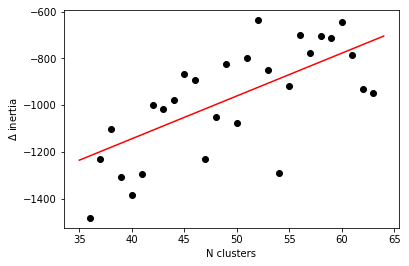

In [151]:
plt.clf()
plt.plot(clusternums[34:], np.gradient(DHSnormed_inertialist)[34:], 'ok')
xx = np.arange(35, 65)
yy = 18.318655280660888 * xx - 1877.0361681356226
plt.plot(xx, yy, '-r')
plt.xlabel('N clusters')
plt.ylabel(r'$\Delta$ inertia')
plt.plot()
plt.show()

In [153]:
linregress(clusternums[38:], np.gradient(DHSnormed_inertialist)[38:])

LinregressResult(slope=17.260686378068531, intercept=-1818.4422488403616, rvalue=0.5809033598983131, pvalue=0.0029147812189290996, stderr=5.1564710470599238)

In [154]:
linregress(clusternums[39:], np.gradient(DHSnormed_inertialist)[39:])

LinregressResult(slope=14.220332564508089, intercept=-1649.1958865521638, rvalue=0.50596348724339746, pvalue=0.013768776240501313, stderr=5.2901461882263376)

In [ ]:
kmeans_normed_DHS= KMeans(n_clusters=36, random_state=0).fit(NormedMixture.T)


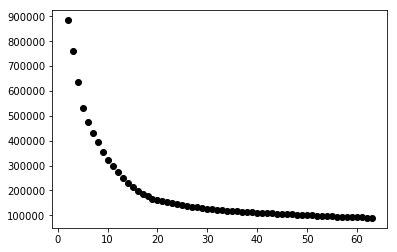

In [155]:
plt.clf()
plt.plot(clusternums, DHSnormed_inertialist, 'ok')
plt.show()

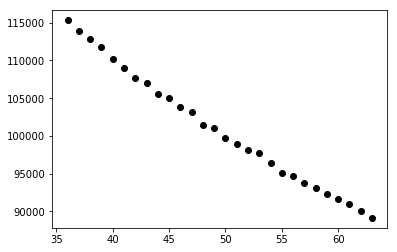

In [156]:
plt.clf()
plt.plot(clusternums[34:], DHSnormed_inertialist[34:], 'ok')
plt.show()

In [157]:
linregress(clusternums[34:], DHSnormed_inertialist[34:])

LinregressResult(slope=-951.23992682248729, intercept=148142.27609408909, rvalue=-0.99644818591152395, pvalue=1.7820528356578288e-29, stderr=15.765320730036548)

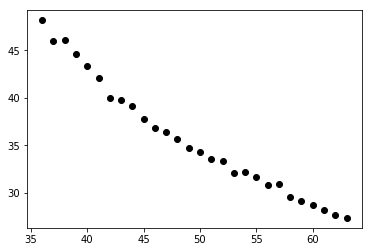

In [159]:
plt.clf()
plt.plot(clusternums[34:],unnormed_inertialist[34:],'ok' )
plt.show()

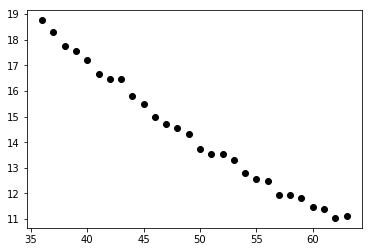

In [160]:
plt.clf()
plt.plot(clusternums[34:],inertialist[34:],'ok' )
plt.show()

In [18]:
kmeans_normed_DHS= KMeans(n_clusters=36, random_state=0).fit(NormedMixture.T)


In [19]:
import seaborn as sns

In [20]:
clusterassignments = kmeans_normed_DHS.labels_


In [27]:
mixturecut = clusterassignments == 1

In [28]:
NormedMixture.T[mixturecut].shape

(60210, 16)

In [29]:
Comp_colors = define_colorsA(16)

In [40]:
np.linspace(0.1, 1.0, 100)

array([ 0.1       ,  0.10909091,  0.11818182,  0.12727273,  0.13636364,
        0.14545455,  0.15454545,  0.16363636,  0.17272727,  0.18181818,
        0.19090909,  0.2       ,  0.20909091,  0.21818182,  0.22727273,
        0.23636364,  0.24545455,  0.25454545,  0.26363636,  0.27272727,
        0.28181818,  0.29090909,  0.3       ,  0.30909091,  0.31818182,
        0.32727273,  0.33636364,  0.34545455,  0.35454545,  0.36363636,
        0.37272727,  0.38181818,  0.39090909,  0.4       ,  0.40909091,
        0.41818182,  0.42727273,  0.43636364,  0.44545455,  0.45454545,
        0.46363636,  0.47272727,  0.48181818,  0.49090909,  0.5       ,
        0.50909091,  0.51818182,  0.52727273,  0.53636364,  0.54545455,
        0.55454545,  0.56363636,  0.57272727,  0.58181818,  0.59090909,
        0.6       ,  0.60909091,  0.61818182,  0.62727273,  0.63636364,
        0.64545455,  0.65454545,  0.66363636,  0.67272727,  0.68181818,
        0.69090909,  0.7       ,  0.70909091,  0.71818182,  0.72

doing  0
doing  1
doing  2
doing  3
doing  4
doing  5
doing  6
doing  7
doing  8
doing  9
doing  10
doing  11
doing  12
doing  13
doing  14
doing  15


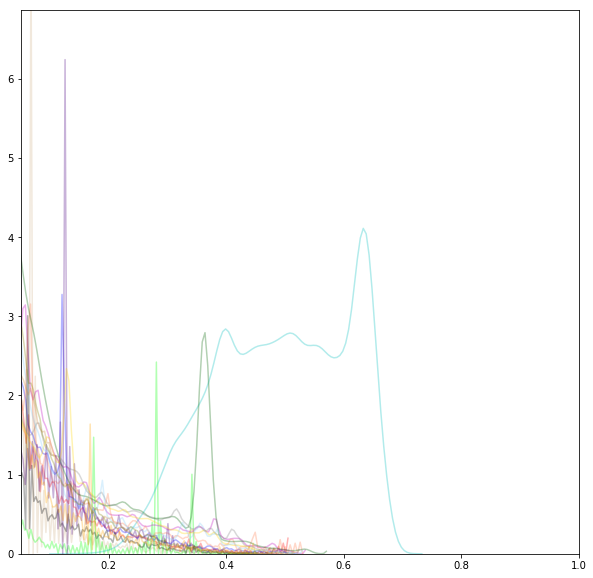

In [178]:
plt.clf()
plt.figure(figsize=(10,10))
ax = plt.gca()
#ax.set_xlim(0.1, 1)

currentymax = 0

for i in range(16):
    print('doing ',i)
    fog = sns.distplot(NormedMixture.T[mixturecut][:,i], color=Comp_colors[i],hist=False, kde_kws = {"alpha":0.3})
    zag = fog.axes
    for line in zag.lines:
        yline = line.get_ydata()
        xline = line.get_xdata()
        xlinecut = xline>0.1
        ymax = np.max(yline[xlinecut])
        #print('ymax ',ymax)
        if (ymax > currentymax):
            currentymax = ymax

currentymax*=1.1
ax.set_xlim(0.05, 1)
ax.set_ylim(0, currentymax)
plt.show()

In [193]:
def NMF_density_plot(mydata,Comp_colors, foutname=''):
    plt.clf()
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    #ax.set_xlim(0.1, 1)

    currentymax = 0

    for i in range(16):
        #print('doing ',i)
        fog = sns.distplot(NormedMixture.T[mixturecut][:,i], color=Comp_colors[i],hist=True, hist_kws={"alpha":1.0, "histtype":"step"}, kde_kws = {"alpha":0.0})
        zag = fog.axes
        for line in zag.lines:
            yline = line.get_ydata()
            xline = line.get_xdata()
            xlinecut = xline>0.1
            ymax = np.max(yline[xlinecut])
            #print('ymax ',ymax)
            if (ymax > currentymax):
                currentymax = ymax

    currentymax*=1.1
    ax.set_xlim(0.05, 1)
    ax.set_ylim(0, currentymax)
    plt.xlabel('fractional composition')
    plt.ylabel('normalized density')
    if len(foutname) > 0:
        plt.savefig(foutname)
    else:
        plt.show()


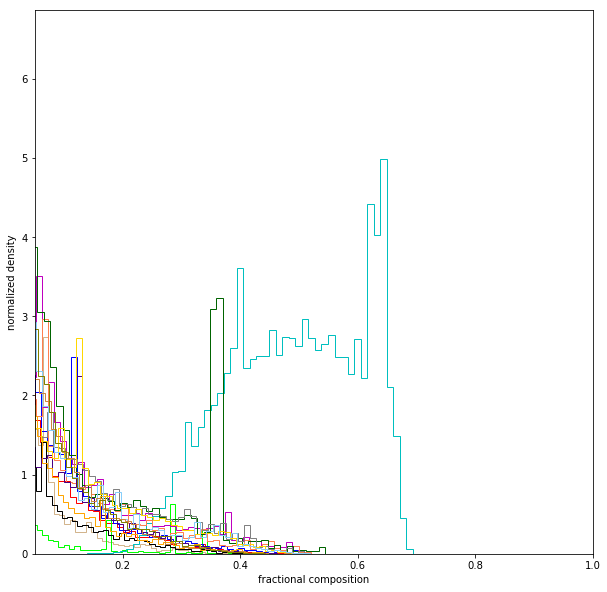

In [194]:
NMF_density_plot(NormedMixture.T[mixturecut], Comp_colors=Comp_colors)

In [ ]:
for i in range(36):
    mixturecut = clusterassignments == i
    

In [52]:
zag = fog.axes

In [89]:
dir(zag)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',


In [123]:
zag.properties()

{'adjustable': 'box',
 'agg_filter': None,
 'alpha': None,
 'anchor': 'C',
 'animated': False,
 'aspect': 'auto',
 'autoscale_on': True,
 'autoscalex_on': True,
 'autoscaley_on': True,
 'axes': <matplotlib.axes._subplots.AxesSubplot at 0x14b2f5048>,
 'axes_locator': None,
 'axis_bgcolor': (1.0, 1.0, 1.0, 1),
 'axisbelow': 'line',
 'children': [<matplotlib.lines.Line2D at 0x1366daf60>,
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'cursor_props': (1, (0.0, 0.0, 0.0, 1)),
 'data_ratio': 106.39671967703418,
 'default_bbox_extra_artists': [<matplotlib.lines.Line2D at 0x1366daf60>,
 'facecolor': (1.0, 1.0, 1.0, 1),
 'fc': (1.0, 1.0, 1.0, 1),
 'figure': <matplotlib.figure.Figure at 0x14acff908>,
 'frame_on': True,
 'geometry': (1, 1, 1),
 'gid': None,
 'images': <a list of 0 AxesImage objects>,
 'label': '',
 'legend': None,
 'legend_handles_labels': ([], []),
 'lines': <a list of 16 Line2D objects>,
 'navigate': True,
 'navigate_mode': None,
 'path_effects': [

In [114]:
zag.dataLim

Bbox([[-0.025603370926792733, 0.0], [0.7331488563797369, 80.72874803305817]])

In [142]:
zag.lines[0].get_ydata()

array([  0.00000000e+00,   3.67136920e-01,   3.80500776e+00,
         1.37353743e+01,   6.00336821e+00,   8.38017266e+00,
         6.25601602e+00,   4.30306058e+00,   3.53694017e+00,
         3.80075181e+00,   2.82026665e+00,   2.77993418e+00,
         2.02582671e+00,   2.08206260e+00,   1.92556586e+00,
         1.68538574e+00,   1.39635436e+00,   1.75355105e+00,
         1.07728405e+00,   1.34889594e+00,   1.21234535e+00,
         1.15626678e+00,   7.84194915e-01,   1.11786661e+00,
         9.51593337e-01,   9.53101541e-01,   8.45150668e-01,
         9.08625843e-01,   8.94979835e-01,   7.79152273e-01,
         6.36411310e-01,   7.26411750e-01,   6.47858265e-01,
         6.87276531e-01,   6.34733188e-01,   8.82500314e-01,
         5.93878665e-01,   5.82254232e-01,   4.77434053e-01,
         5.55382168e-01,   5.86395931e-01,   4.92488379e-01,
         3.82130500e-01,   4.14953860e-01,   3.99077946e-01,
         4.14490441e-01,   3.52807152e-01,   4.21645325e-01,
         3.43578524e-01,

In [ ]:
zag.lines[0].get_ydata()

In [ ]:
update_datalim

In [169]:
clusterassignments = kmeans_normed_DHS.labels_
for i in range(36):
    print('doing ',i)
    mixturecut = clusterassignments==i
    print('basiscut length ',len(mixturecut[mixturecut]))
    
    if len(mixturecut[mixturecut] ) > 40:
        chosenNum = 40
    else:
        chosenNum = len(mixturecut[mixturecut])
    
    possibleDHS = np.arange(len(mixturecut))[mixturecut]
    desiredDHS = np.random.choice(possibleDHS, chosenNum,replace=False)
    VisualDHScut = np.in1d(np.arange(len(mixturecut)), desiredDHS)
    winningcomp = np.argmax(np.sum(NormedMixture.T[VisualDHScut], axis=0))
    desired_order = np.argsort(-NormedMixture.T[VisualDHScut][:,winningcomp])
    #UNnormedbarsortorder = get_barsortorder(Mixture.T[mixturecut])
    make_stacked_bar_plot(16, chosenNum, NormedMixture.T[VisualDHScut][desired_order].T, 'DHScluster'+str(i)+'outof36.pdf')

doing  0
basiscut length  40252
inventing barsortorder
inventing names
doing  1
basiscut length  60210
inventing barsortorder
inventing names
doing  2
basiscut length  99365
inventing barsortorder
inventing names
doing  3
basiscut length  117880
inventing barsortorder
inventing names
doing  4
basiscut length  103073
inventing barsortorder
inventing names
doing  5
basiscut length  60495
inventing barsortorder
inventing names
doing  6
basiscut length  172998
inventing barsortorder
inventing names
doing  7
basiscut length  46605
inventing barsortorder
inventing names
doing  8
basiscut length  49593
inventing barsortorder
inventing names
doing  9
basiscut length  66417
inventing barsortorder
inventing names
doing  10
basiscut length  29758
inventing barsortorder
inventing names
doing  11
basiscut length  87388
inventing barsortorder
inventing names
doing  12
basiscut length  43943
inventing barsortorder
inventing names
doing  13
basiscut length  60796
inventing barsortorder
inventing names

In [168]:
np.sum(NormedMixture.T, axis=0)

array([  84439.79489395,   69100.20713906,   35041.78169958,
        123973.99460523,  312290.11814599,   94179.06659107,
        128070.1082481 ,  310291.40406758,   75472.41913456,
         78869.03494458,   93124.51685064,  234496.03048504,
        112289.30867728,  238516.39131072,  158648.33479698,
         83941.48840933])

In [170]:
clusternums

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63]

In [171]:
clusternums = clusternums + [i for i in range(64, 128)]

In [172]:
clusternums

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [174]:
clusternums[62]

64

In [177]:
for i in clusternums[62:]:
    print('doing ',i)
    kmeans_normed_sample = KMeans(n_clusters=i, random_state=0).fit(normedBasis)
    inertialist.append(kmeans_normed_sample.inertia_)


doing  64
doing  65
doing  66
doing  67
doing  68
doing  69
doing  70
doing  71
doing  72
doing  73
doing  74
doing  75
doing  76
doing  77
doing  78
doing  79
doing  80
doing  81
doing  82
doing  83
doing  84
doing  85
doing  86
doing  87
doing  88
doing  89
doing  90
doing  91
doing  92
doing  93
doing  94
doing  95
doing  96
doing  97
doing  98
doing  99
doing  100
doing  101
doing  102
doing  103
doing  104
doing  105
doing  106
doing  107
doing  108
doing  109
doing  110
doing  111
doing  112
doing  113
doing  114
doing  115
doing  116
doing  117
doing  118
doing  119
doing  120
doing  121
doing  122
doing  123
doing  124
doing  125
doing  126
doing  127


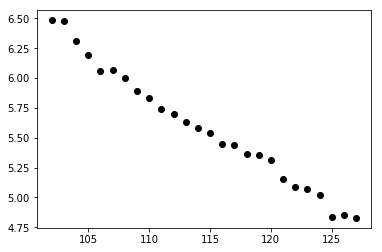

In [180]:
plt.clf()
plt.plot(clusternums[100:],inertialist[100:],'ok' )
plt.show()

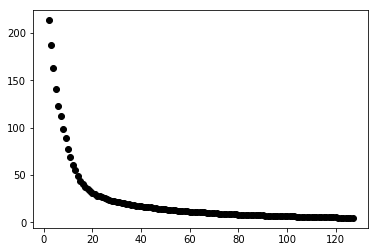

In [181]:
plt.clf()
plt.plot(clusternums,inertialist,'ok' )
plt.show()

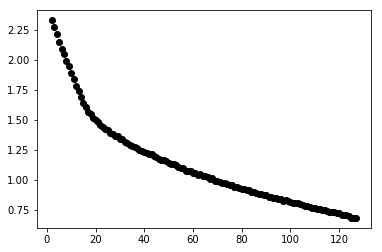

In [182]:
plt.clf()
plt.plot(clusternums,np.log10(inertialist),'ok' )
plt.show()

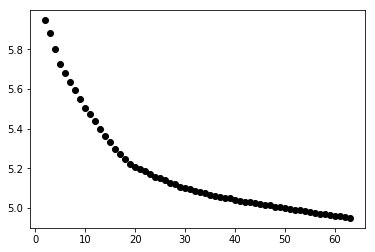

In [185]:
plt.clf()
plt.plot(clusternums[:62],np.log10(DHSnormed_inertialist),'ok' )
plt.show()


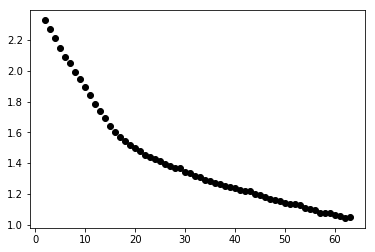

In [186]:
plt.clf()
plt.plot(clusternums[:62],np.log10(inertialist[:62]),'ok' )
plt.show()

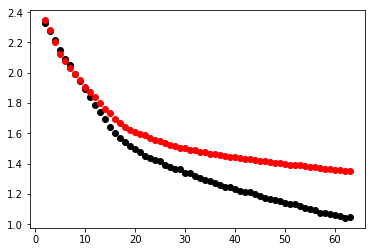

In [191]:
plt.clf()
plt.plot(clusternums[:62],np.log10(inertialist[:62]),'ok' )
plt.plot(clusternums[:62],np.log10(DHSnormed_inertialist)-3.6,'or' )
plt.show()


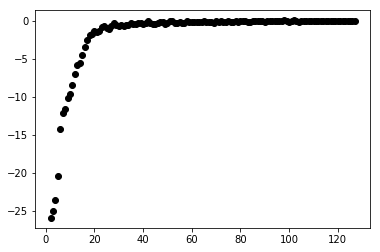

In [192]:
plt.clf()
plt.plot(clusternums,np.gradient(inertialist),'ok' )
plt.show()

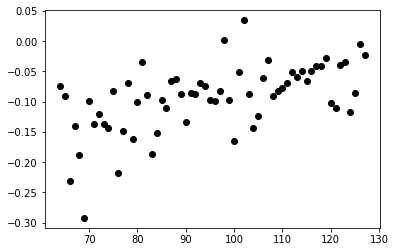

In [193]:
plt.clf()
plt.plot(clusternums[62:],np.gradient(inertialist[62:]),'ok' )
plt.show()

In [194]:
linregress(clusternums[62:],np.gradient(inertialist[62:]))

LinregressResult(slope=0.0017243157102216473, intercept=-0.25813616047266014, rvalue=0.56788325156247066, pvalue=9.8815029278357368e-07, stderr=0.00031740903899433293)

In [197]:
linregress(clusternums[70:],np.gradient(inertialist[70:]))

LinregressResult(slope=0.0013276472471111453, intercept=-0.21496856566364805, rvalue=0.45227104007916624, pvalue=0.0004662606508423032, stderr=0.00035628187571882445)